# COGS 108 - Final Project 

# Overview

In this project I intended to find a relationship between Park distributions and  Asthma cases in San Diego County and to find a relationship between Park distributions and Low Birth Weights in San Diego County. San Diego County Park Locations, San Diego County Health Screenings and California Zip Codes Geolocations were used to determine the relationship between these two arguments. With the given data, I found there is no correlation between Park distributions and Asthma or Low Birth Rates in San Diego County.

# Name & GitHub ID

- Name: Varduhi Torosyan
- GitHub Username: vardtlv

# Research Question

How does the Park distribution in San Diego county affect the health condition of the residents? Specifically, what is the effect of Park distributions in San Diego County on Asthma cases and Low Birth Weights.

## Background and Prior Work

As suggested in sandiegocounty.gov 12.3% of San Diego County residents reported being diagnosed with Asthma (2019). Also, on average 33 San Diego County residents die from Asthma. Another data indicated that Asthma costs the United States $56 billion each year. (1)

Causes of Asthma include airborne allergies, respiratory infections, physical activity, cold air, certain medications, air pollution, stress (2). Noticeable count of Asthma triggers are related to environmental conditions, which gives a reason to assume that improvement of Environmental conditions can have a positive effect on Asthma patients. 

Researchers from MDPI tried to find an association between Neighborhood Green Space Protective and Child Asthma. They examined 6 to 7 years old 4447 children in Australia, who had doctor-diagnosed Asthma. In this research they found that in areas with 0-20% green space coverage, the odds ratio of affirmative asthma was 1.87. However in Areas with 40% green space coverage, the odds ratio of affirmative asthma was significantly lower, 0.32. This research was condemned in areas with heavy traffic, and there is no data associated with the areas that were not exposed to heavy traffic (3).

Another research from EHP, tried to find the Risks and Benefits of Green Spaces for Children. They examined 9 to 12 years old 3178 schoolchildren in Sabadell, Spain. With the questionnaire they collected data about residential surrounding greenness and determined the NDVI around each house. In this research they didn’t find any correlation between residential surrounding greens and Asthma cases. However, they found that children that lived close to parks had 60% higher relative prevalence of current asthma cases (4).

References (include links):
- 1) https://www.sandiegocounty.gov/content/dam/sdc/hhsa/programs/phs/documents/CHS-BHOFAQI_Asthma_SlideSet.pdf
- 2) https://www.mayoclinic.org/diseases-conditions/asthma/symptoms-causes/syc-20369653
- 3) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5451993/
- 4) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4256701/

# Hypothesis


\begin{equation}
H_0: \text{There is no relationship Park locations and Asthma cases } ( \beta = 0) \\ 
H_0: \text{There is no relationship Park locations and Low Birth Weight } ( \beta = 0) \\
\end{equation}
<br>
\begin{equation}
H_a: \text{There is a relationship Park locations and Asthma cases } ( \beta \neq 0) \\
H_a: \text{There is a relationship Park locations and Low Birth Weight } ( \beta \neq 0) \\ 
\end{equation}

# Datasets

- Dataset Name: **California Environmental Health Screening Data**
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/calenviroscreen-final-report.csv
- Number of observations: **8035 rows × 52 columns** 
<br>
<br>California Environmental Health Screening Data represents Census data about San Diego County Resindent’s helth, economic status and geographic information. The population for each area, corresponding Asthma Low and  Birth Weight can be used to condemn the current research. 
***
- Dataset Name: **Park Locations Data**
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/parks_datasd.geojson
- Number of observations: **2769 rows × 8 columns**
<br>
<br>Park Locations Data represents San Diego County Park’s information and geolocations. The main use of this data is to identify parks for each zip area.
***
- Dataset Name: **California Zip Codes Geo**
- Link to the dataset: https://github.com/OpenDataDE/State-zip-code-GeoJSON/blob/master/ca_california_zip_codes_geo.min.jsonreport.csv
- Number of observations: **1769 rows × 12 columns**
<br>
<br>California Zip Codes Geo represents Zip codes for all California regions and all corresponding geological information. It is going to be used to identify park locations, and match park data with Census data. 
***
California Environmental Health Screening Data is represented using San Diego Zip Codes, however the Park Location Data only includes the specific geolocations and no zip codes. California Zip Codes Geo can be used to identify Park zips and combine given data.

# Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

import requests
import patsy
import statsmodels.api as sm
import shapely.geometry as shp
from geopy.geocoders import Nominatim
from shapely.geometry import Point
from shapely.geometry import Polygon
from scipy.stats import pearsonr, norm, ttest_ind

# set plotting size parameter
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = (17, 7)

from mpl_toolkits.axes_grid1 import make_axes_locatable

import sklearn.neighbors as skn
import sklearn.metrics as skm

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 10

#improve resolution
%config InlineBackend.figure_format ='retina'

In [2]:
#import data
url_health="https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/calenviroscreen-final-report.csv"
health=pd.read_csv(url_health)
url_parks = "https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/parks_datasd.geojson"
parks = gpd.read_file(url_parks)
url_cal_zip = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/ca_california_zip_codes_geo.min.json"
cal_zip = gpd.read_file(url_cal_zip)

# Data Cleaning

The research is being done for San Diego County, therefore the given data can be cleared up, to only include inforamtion about San Dego County. Next, health can be cleared up to only include columns related to Location, Population, Asthma and Low Birth Weight rates. 

In [3]:
health = health[['Total Population', 'Asthma', 'Low Birth Weight', 'Location 1']]
health

,Total Population,Asthma,Low Birth Weight,Location 1
0,3174,130.748821,0.058025,"Fresno 93706\n(36.709695199999999, -119.7816961)"
1,3609,132.400000,0.061233,"Fresno 93706\n(36.726461999999998, -119.8010347)"
2,3167,132.321225,0.062864,"Fresno 93706\n(36.735491400000001, -119.8055044)"
3,2206,69.533088,0.052535,"Fresno 93725\n(36.681600000000003, -119.717842..."
4,6161,116.899716,0.062997,"Fresno 93721\n(36.743062999999999, -119.7933565)"
...,...,...,...,...
8030,719,20.168018,0.052333,"Mountain View 94035\n(37.416475499999997, -122..."
8031,7810,91.380387,NaN,"Vacaville 95687\n(38.320655700000003, -121.978..."
8032,16,38.695000,NaN,"Travis AFB 94535\n(38.254451500000002, -121.94..."
8033,3590,43.865000,NaN,"Jamestown 95327\n(37.8919389, -120.5370715)"


In order to get geolocation for each observation, the Location 1 can be split. After splitting the zip codes can be stored. 

In [4]:
#get Zip codes from Locations in health
health[['State_Zip','Loc']] = health['Location 1'].str.split("\n",expand=True)
health[['zip']] = health['State_Zip'].str.split(" ").str[-1]
health.drop(columns = ['Location 1', 'State_Zip'])

,Total Population,Asthma,Low Birth Weight,Loc,zip
0,3174,130.748821,0.058025,"(36.709695199999999, -119.7816961)",93706
1,3609,132.400000,0.061233,"(36.726461999999998, -119.8010347)",93706
2,3167,132.321225,0.062864,"(36.735491400000001, -119.8055044)",93706
3,2206,69.533088,0.052535,"(36.681600000000003, -119.71784270000001)",93725
4,6161,116.899716,0.062997,"(36.743062999999999, -119.7933565)",93721
...,...,...,...,...,...
8030,719,20.168018,0.052333,"(37.416475499999997, -122.04972359999999)",94035
8031,7810,91.380387,NaN,"(38.320655700000003, -121.97878470000001)",95687
8032,16,38.695000,NaN,"(38.254451500000002, -121.9456515)",94535
8033,3590,43.865000,NaN,"(37.8919389, -120.5370715)",95327


In order to only plot San Diego County on the map, zip codes that are not included in health can be removed from zip code data.

In [5]:
#Get zip code related areas only for San Diego County 
unique_zips = health['zip'].unique()
cal_zip = cal_zip[['ZCTA5CE10', 'geometry']]
cal_zip = cal_zip.loc[cal_zip['ZCTA5CE10'].isin(unique_zips)]
cal_zip

,ZCTA5CE10,geometry
0,94601,"POLYGON ((-122.22717 37.79197, -122.22693 37.7..."
1,94501,"POLYGON ((-122.29181 37.76301, -122.30661 37.7..."
2,94560,"POLYGON ((-122.05499 37.54959, -122.05441 37.5..."
3,94587,"POLYGON ((-122.06515 37.60485, -122.06499 37.6..."
4,94580,"POLYGON ((-122.12999 37.68445, -122.12995 37.6..."
...,...,...
1755,95618,"POLYGON ((-121.69419 38.55883, -121.69419 38.5..."
1756,95351,"POLYGON ((-121.03047 37.61203, -121.03048 37.6..."
1760,93274,"POLYGON ((-119.53642 36.12059, -119.53643 36.1..."
1761,95370,"POLYGON ((-120.25821 38.04170, -120.25822 38.0..."


In [6]:
#Clean up irelevent data from parks. keep name, location and geomerty
parks = parks[['name', 'location', 'geometry']]
parks

,name,location,geometry
0,South Carlsbad SB,,"MULTIPOLYGON (((-117.31431 33.09015, -117.3142..."
1,Torrey Pines SB,,"POLYGON ((-117.26147 32.93883, -117.26181 32.9..."
2,Ruocco Park,"585 Harbor Ln, San Diego. California","POLYGON ((-117.17298 32.71167, -117.17303 32.7..."
3,Tuna Harbor Park,"700 North Harbor Dr, San Diego. California","POLYGON ((-117.17260 32.71160, -117.17268 32.7..."
4,San Diego Bayfront Park,"One Park Boulevard, San Diego. California","MULTIPOLYGON (((-117.16074 32.70407, -117.1594..."
...,...,...,...
2764,San Luis Rey River Park,"5521 W. Lilac Road, Bonsall, CA 92003","MULTIPOLYGON (((-117.17632 33.31105, -117.1766..."
2765,Horse Creek Ridge Sports Park,"240 Gold Palomino Way, Fallbrook CA, 92028","POLYGON ((-117.15413 33.35376, -117.15413 33.3..."
2766,,"2815 STARRY NIGHT DR, Escondido, CA 92029","POLYGON ((-117.13226 33.10238, -117.13225 33.1..."
2767,Harmony Grove Community Park,"2982 Harmony Grove Road, Escondido, CA 92029","POLYGON ((-117.13391 33.09869, -117.13376 33.0..."


In [7]:
#Function that determines in which San Diego County zip area is given park geo
def getZip(geo):
    for keyi, valuei in cal_zip.iterrows(): 
            #if valuei.loc['geometry'].contains(geo):
            if valuei.loc['geometry'].intersects(geo):
                returnVal = valuei.loc['ZCTA5CE10']
                return returnVal

In [8]:
#Find are zips for each park
parks['zip'] = parks.geometry.apply(getZip)

In [9]:
#remove Parks that were outside given zips
parks = parks[parks['zip'].notna()]
#get number of parks for each zip
cal_zip = cal_zip.set_axis(['zip', 'geometry'], axis=1, inplace=False)
#combine park acres
temp = parks.groupby(['zip']).size().to_frame('ParkCnt').reset_index()
result = pd.merge(cal_zip, temp, on='zip')

In [10]:
#combine health screenings
health = health.groupby(['zip']).agg({'Total Population':'sum','Asthma':'sum', 'Low Birth Weight':'sum'}).reset_index()
result = pd.merge(result, health, on='zip')

After counting the number of parks for each zip, results will now include the Park Count. The result will include combined data for CA area zip codes with geolocations, number of parks for each area, population, Asthma and Low Birth Weight data.

In [11]:
result

,zip,geometry,ParkCnt,Total Population,Asthma,Low Birth Weight
0,92673,"POLYGON ((-117.57965 33.49068, -117.57888 33.4...",1,19632,53.672055,0.138119
1,92014,"MULTIPOLYGON (((-117.25330 32.97994, -117.2532...",21,22387,50.997753,0.199370
2,92020,"POLYGON ((-116.95575 32.76295, -116.95577 32.7...",10,63689,754.190488,0.722674
3,92111,"POLYGON ((-117.16476 32.82585, -117.16513 32.8...",43,45236,356.198882,0.456312
4,92108,"MULTIPOLYGON (((-117.10392 32.77212, -117.1042...",10,14698,76.298068,0.149533
...,...,...,...,...,...,...
82,91945,"POLYGON ((-117.05968 32.73047, -117.05971 32.7...",8,26043,363.662677,0.316343
83,92113,"POLYGON ((-117.15279 32.70522, -117.15266 32.7...",18,56589,1038.990059,0.678229
84,91901,"POLYGON ((-116.80233 32.85696, -116.80231 32.8...",2,18191,85.911748,0.191939
85,92115,"POLYGON ((-117.06712 32.74214, -117.06712 32.7...",10,56552,566.335475,0.630294


# Data Analysis & Results

In order to understand the population distribution in San Diego county, we can plot the Population map.

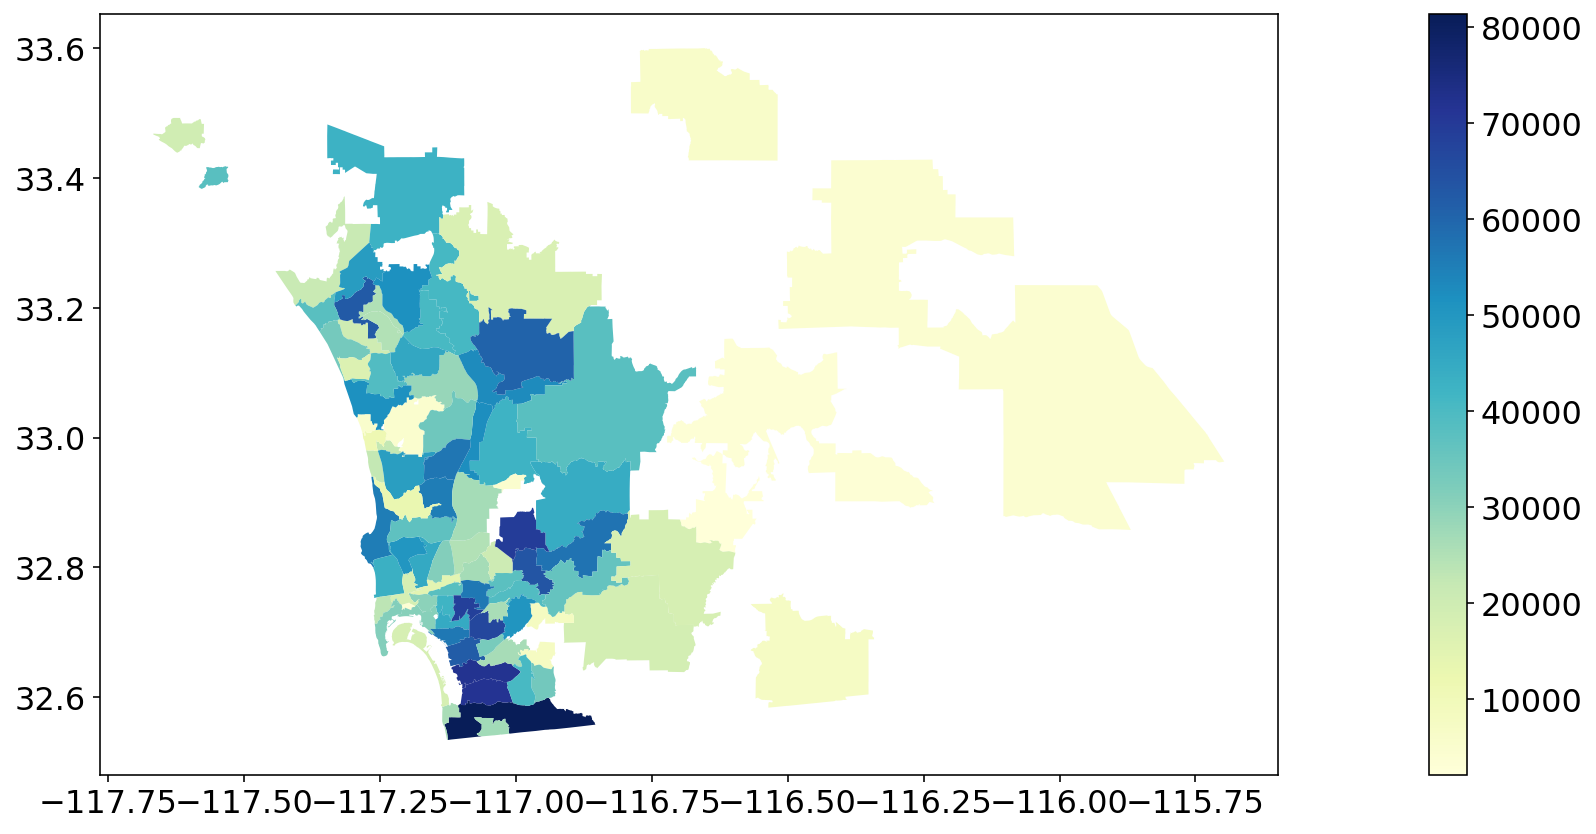

In [12]:
#San Diego population
fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
result.plot(column='Total Population', ax=ax, cmap='YlGnBu', legend=True);

The number of parks for each zip may be affected by population. To have a better understanding of park distribution, the number of park acres should be replaced by the number of parks per population. Same applies for Asthma case and Low Birth Weight.

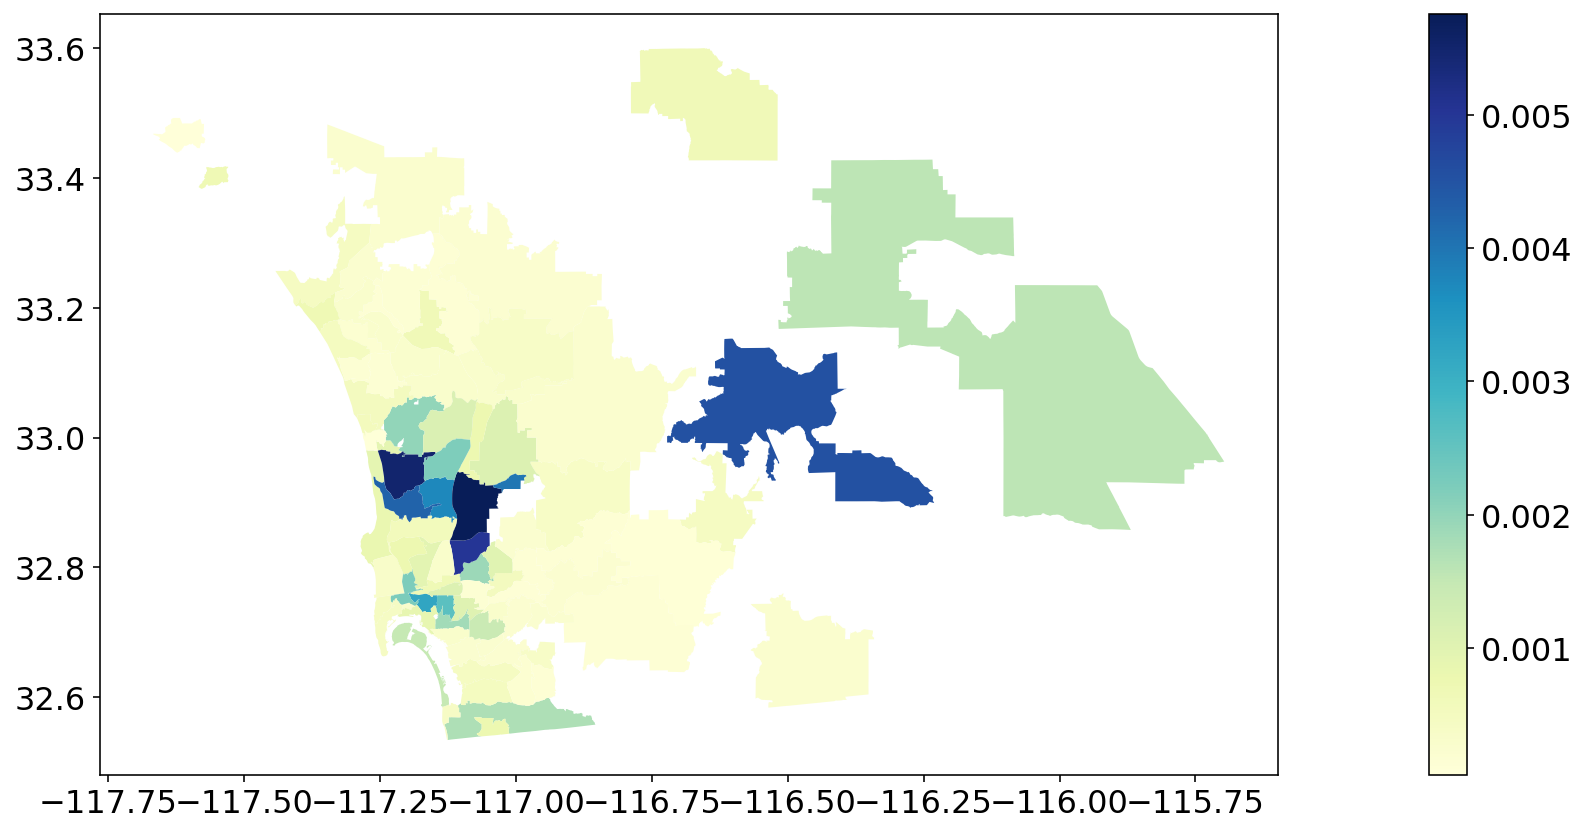

In [13]:
result['ParkspPopulation'] = result['ParkCnt']/result['Total Population']
result['AsthmapPopulation'] = result['Asthma']/result['Total Population']
result['LBWpPopulation'] = result['Low Birth Weight']/result['Total Population']

# Parks per Population
fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
result.plot(column='ParkspPopulation', ax=ax, cmap ='YlGnBu', legend=True);

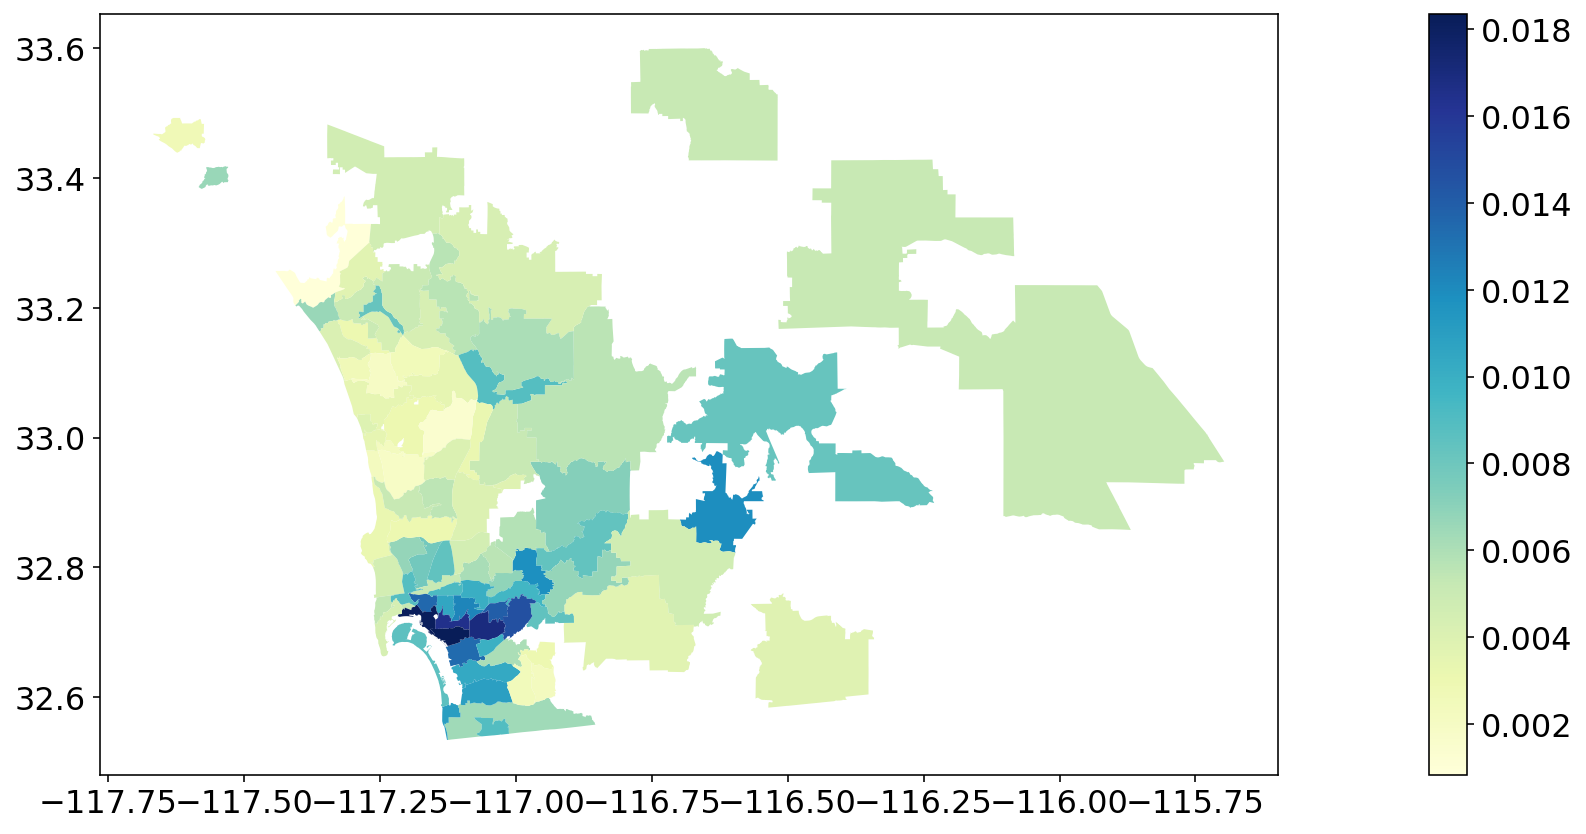

In [14]:
# Asthma
fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
result.plot(column='AsthmapPopulation', ax=ax, cmap='YlGnBu', legend=True);

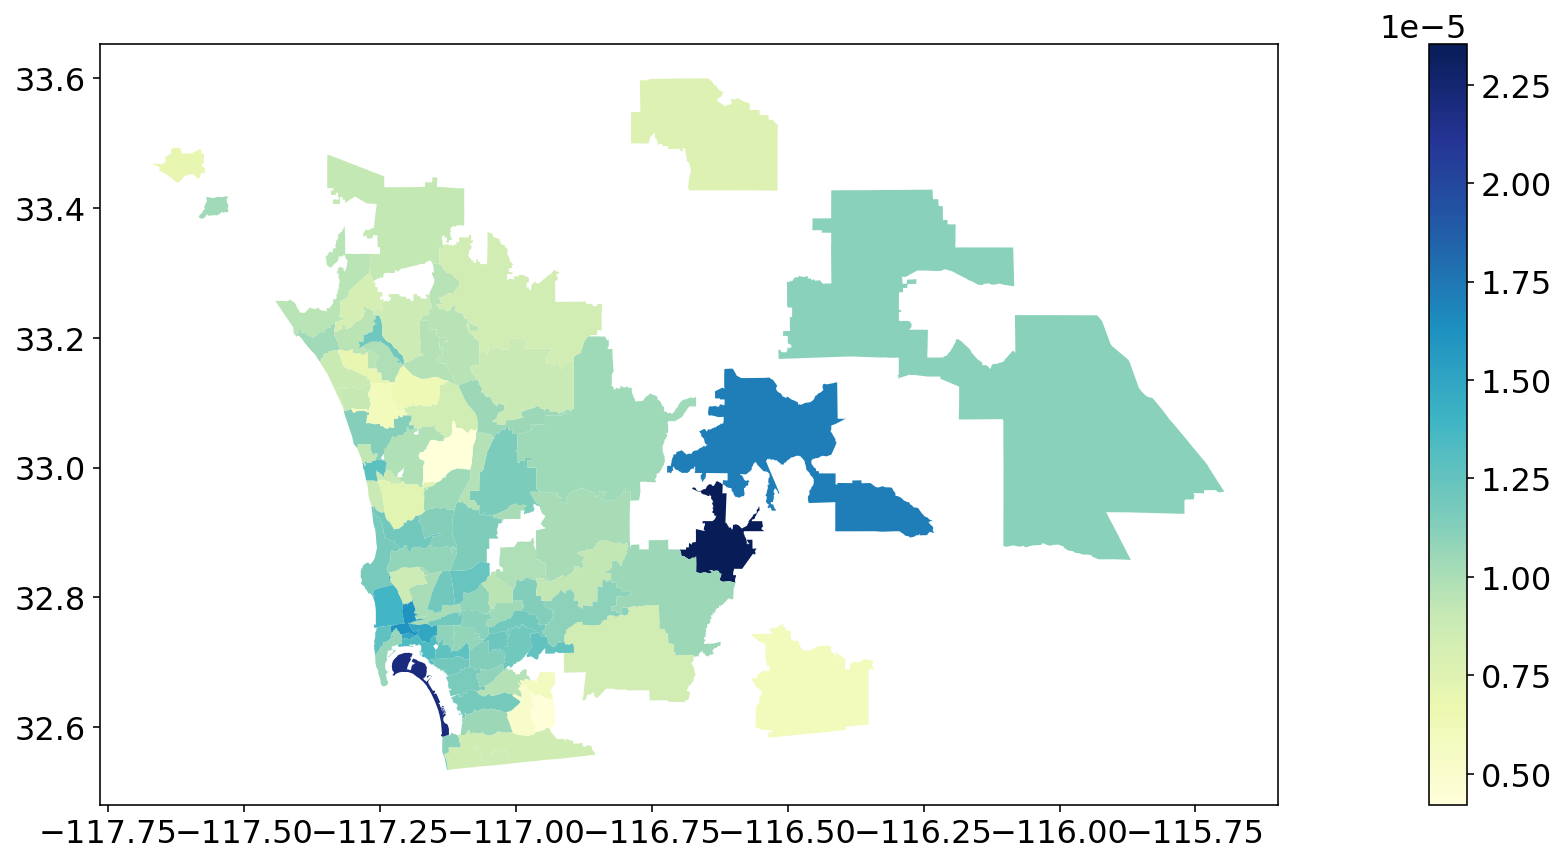

In [15]:
# Low Birth Weight
fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
result.plot(column='LBWpPopulation', ax=ax, cmap='YlGnBu', legend=True);

To understand the data distributions for each element in result we can describe the dataframe. It will help to find the min, max, mean and the outliers.

In [16]:
#look for outliers 
result.describe()

,ParkCnt,Total Population,Asthma,Low Birth Weight,ParkspPopulation,AsthmapPopulation,LBWpPopulation
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,31.068966,35117.804598,255.842748,0.361361,0.000969,0.006659,0.000011
std,45.789913,19192.437016,247.380881,0.209798,0.001280,0.003957,0.000003
min,1.000000,2122.000000,15.245958,0.045234,0.000051,0.000833,0.000004
25%,7.500000,20255.500000,76.994560,0.193082,0.000243,0.003878,0.000009
50%,14.000000,34510.000000,178.011300,0.361656,0.000459,0.005369,0.000010
75%,34.500000,49514.000000,343.449652,0.499510,0.001030,0.008710,0.000012
max,264.000000,81448.000000,1138.006757,0.849610,0.005760,0.018360,0.000024


Taking in count the difference between min and max, compared to min for population. Data elemts do make sense and autliers are related to population spread.

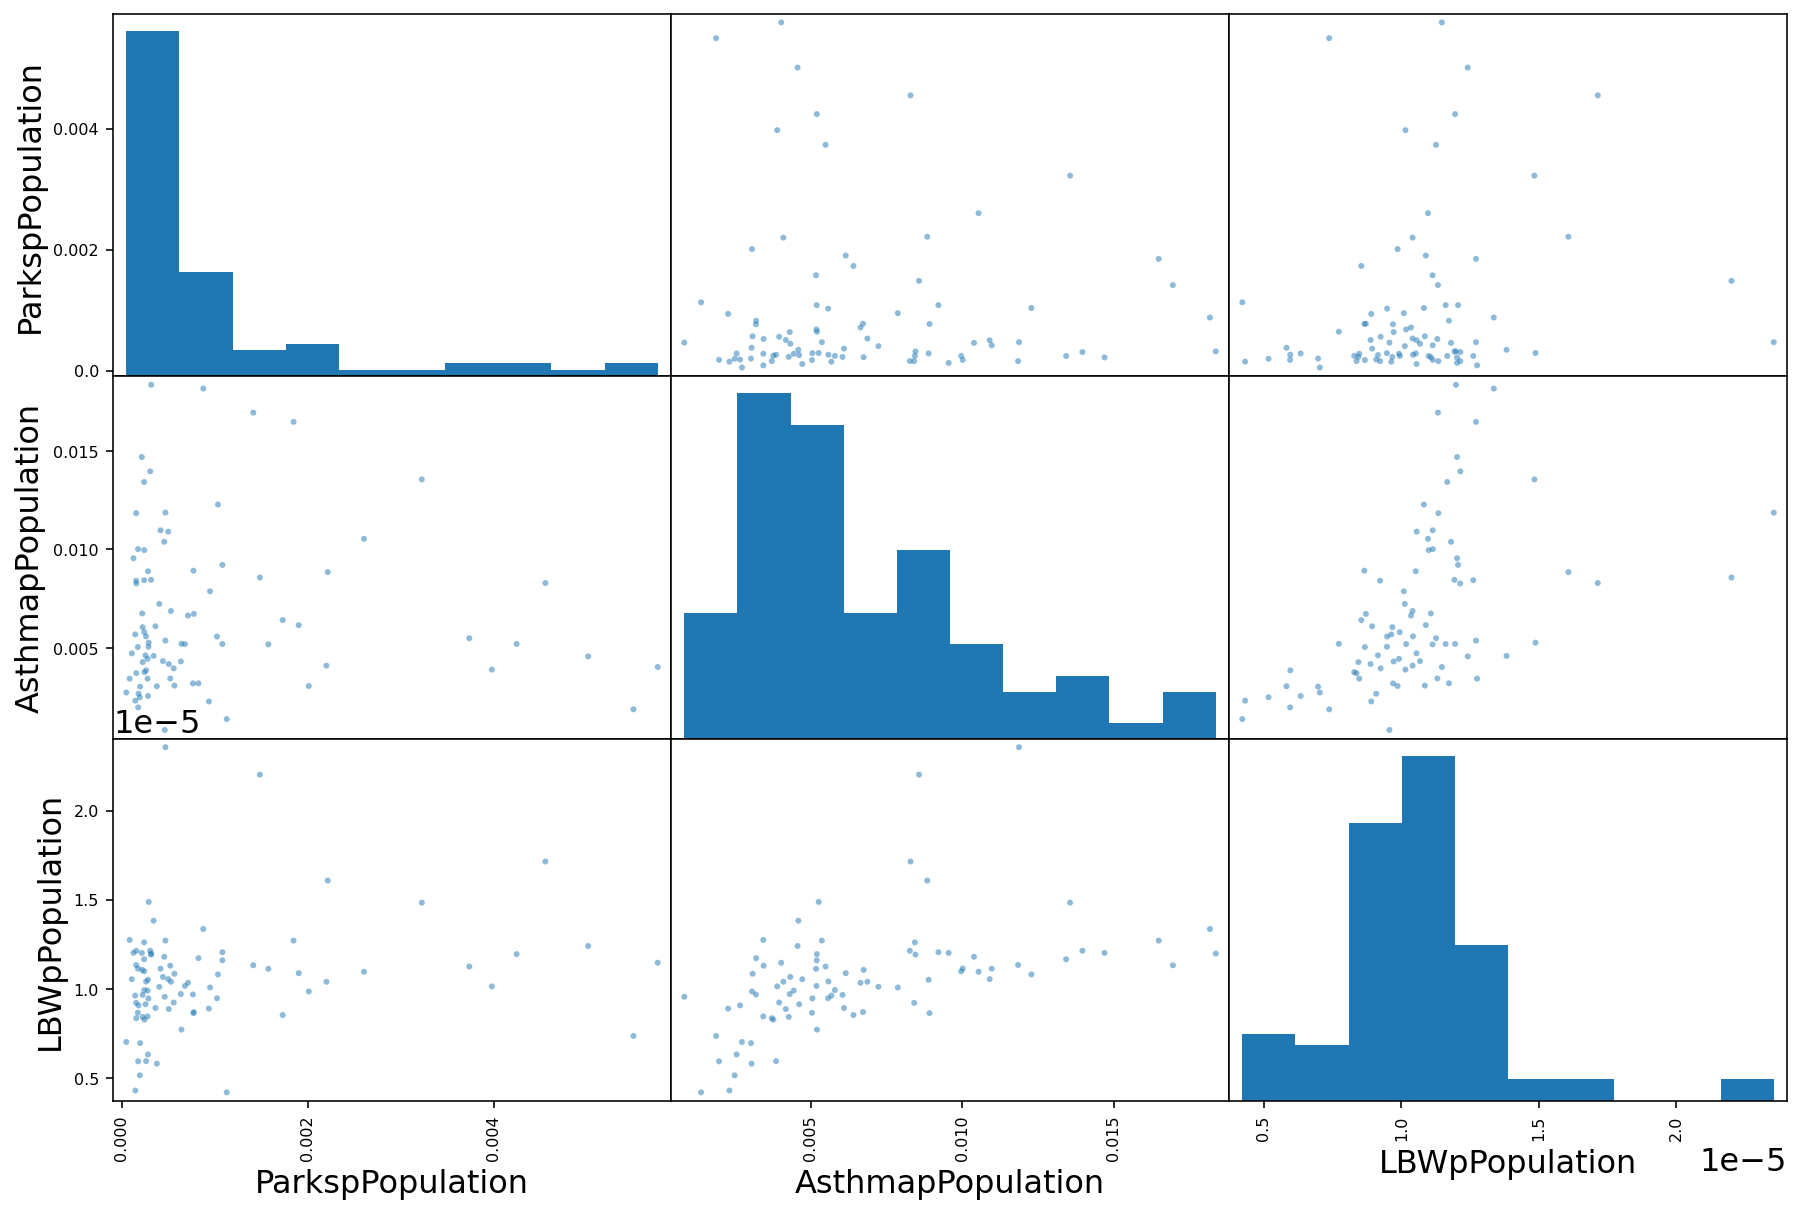

In [17]:
# generate scatter matrix
pd.plotting.scatter_matrix(result[['ParkspPopulation','AsthmapPopulation', 'LBWpPopulation']], 
                           figsize=(15, 10));

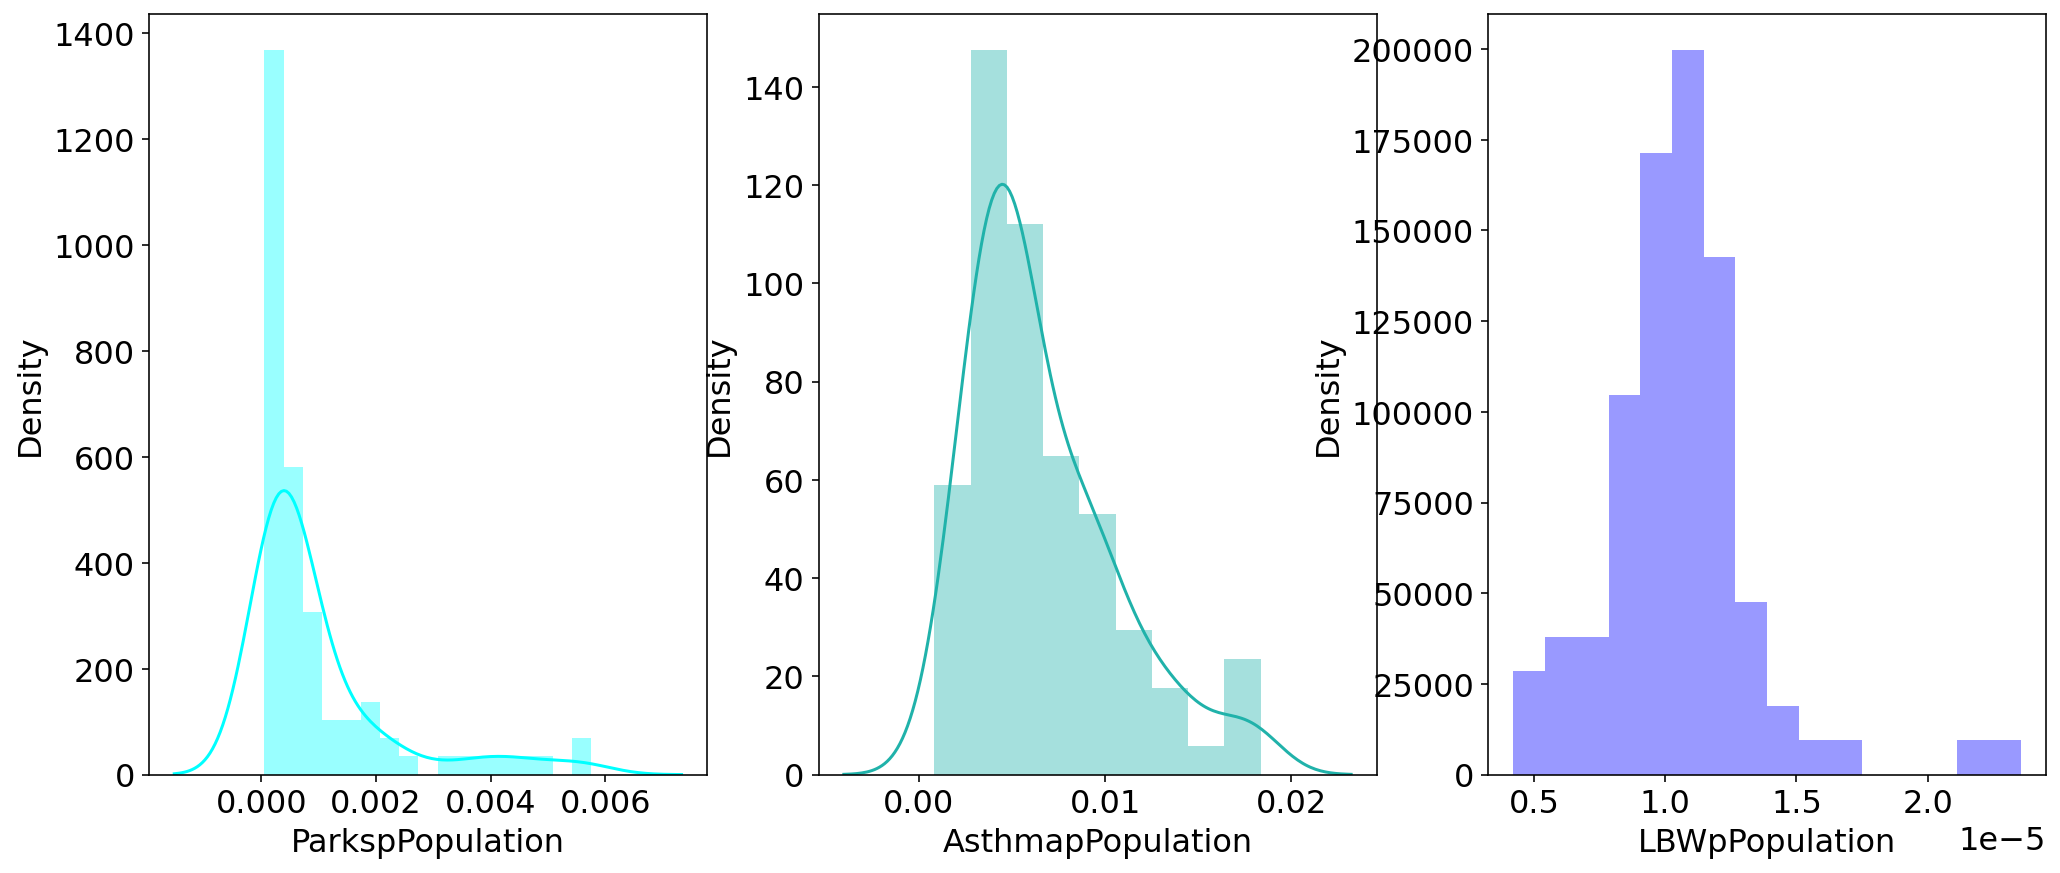

In [18]:
#Look at the distributions of each observation separatly 
plt.subplot(1, 3, 1)
#sns.distplot(result['ParkspPopulation'], color='#DE2D26')
sns.distplot(result['ParkspPopulation'], color='aqua')
plt.subplot(1, 3, 2)
sns.distplot(result['AsthmapPopulation'], color='lightseagreen')
plt.subplot(1, 3, 3)
sns.distplot(result['LBWpPopulation'], color='blue');

With plotting each variable separately we can tell that Parks per Population is right-skewed and most of the areas have 0 to 0.002 parks per person. Asthma is also right-skewed, which indicates that most zip codes have 0 to 500 cases of Asthma. On the other hand Low Birth Rate is uniformly distributed per county.

###### Relationship Park locations and Asthma cases

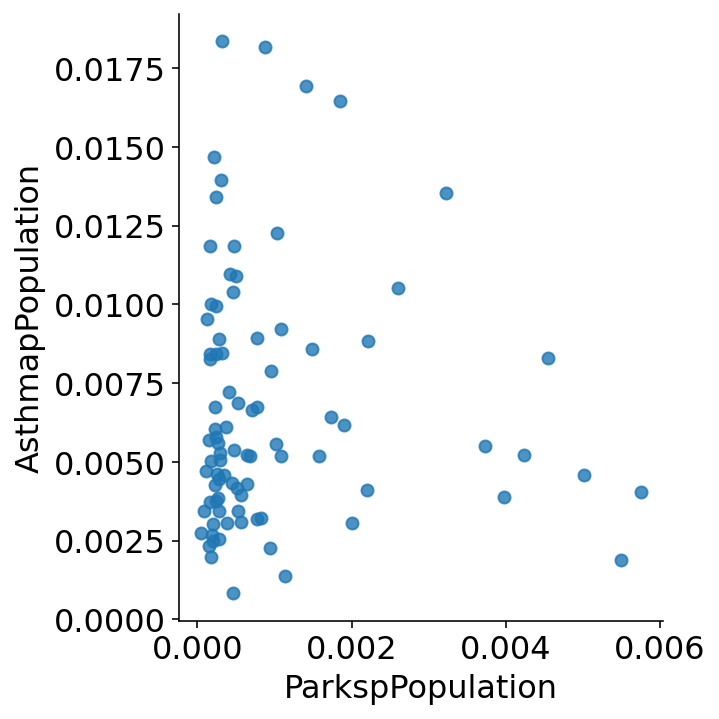

In [19]:
# scatterplot
sns.lmplot(x='ParkspPopulation', y= 'AsthmapPopulation', 
           data=result, fit_reg=False);

The points represent the zip code areas. Majority of the points are close to 0, however there seems to be a small relationship between Parks per Population and Asthma per Population.

The linear regression can be examined using the following equation.
\begin{equation}
outcome = \beta_0 + \beta_1*predictor
\end{equation}

In [20]:
#create matrix with 'Parks per Population' and 'Asthma per Population' points
outcome, predictors = patsy.dmatrices('ParkspPopulation ~ AsthmapPopulation', result)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       ParkspPopulation   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                   0.06981
Date:                Mon, 14 Dec 2020   Prob (F-statistic):              0.792
Time:                        19:57:40   Log-Likelihood:                 456.56
No. Observations:                  87   AIC:                            -909.1
Df Residuals:                      85   BIC:                            -904.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0010      0.00

Using the information above we can rewrite the equation.
\begin{equation}
outcome = 0.0010  + -0.0093*predictor
\end{equation}

With the equation we can tell that with each increase of Parks per Population there is a 0.0093 decrease in Asthma cases. To see the relationship better, find the fit line for the plot model.

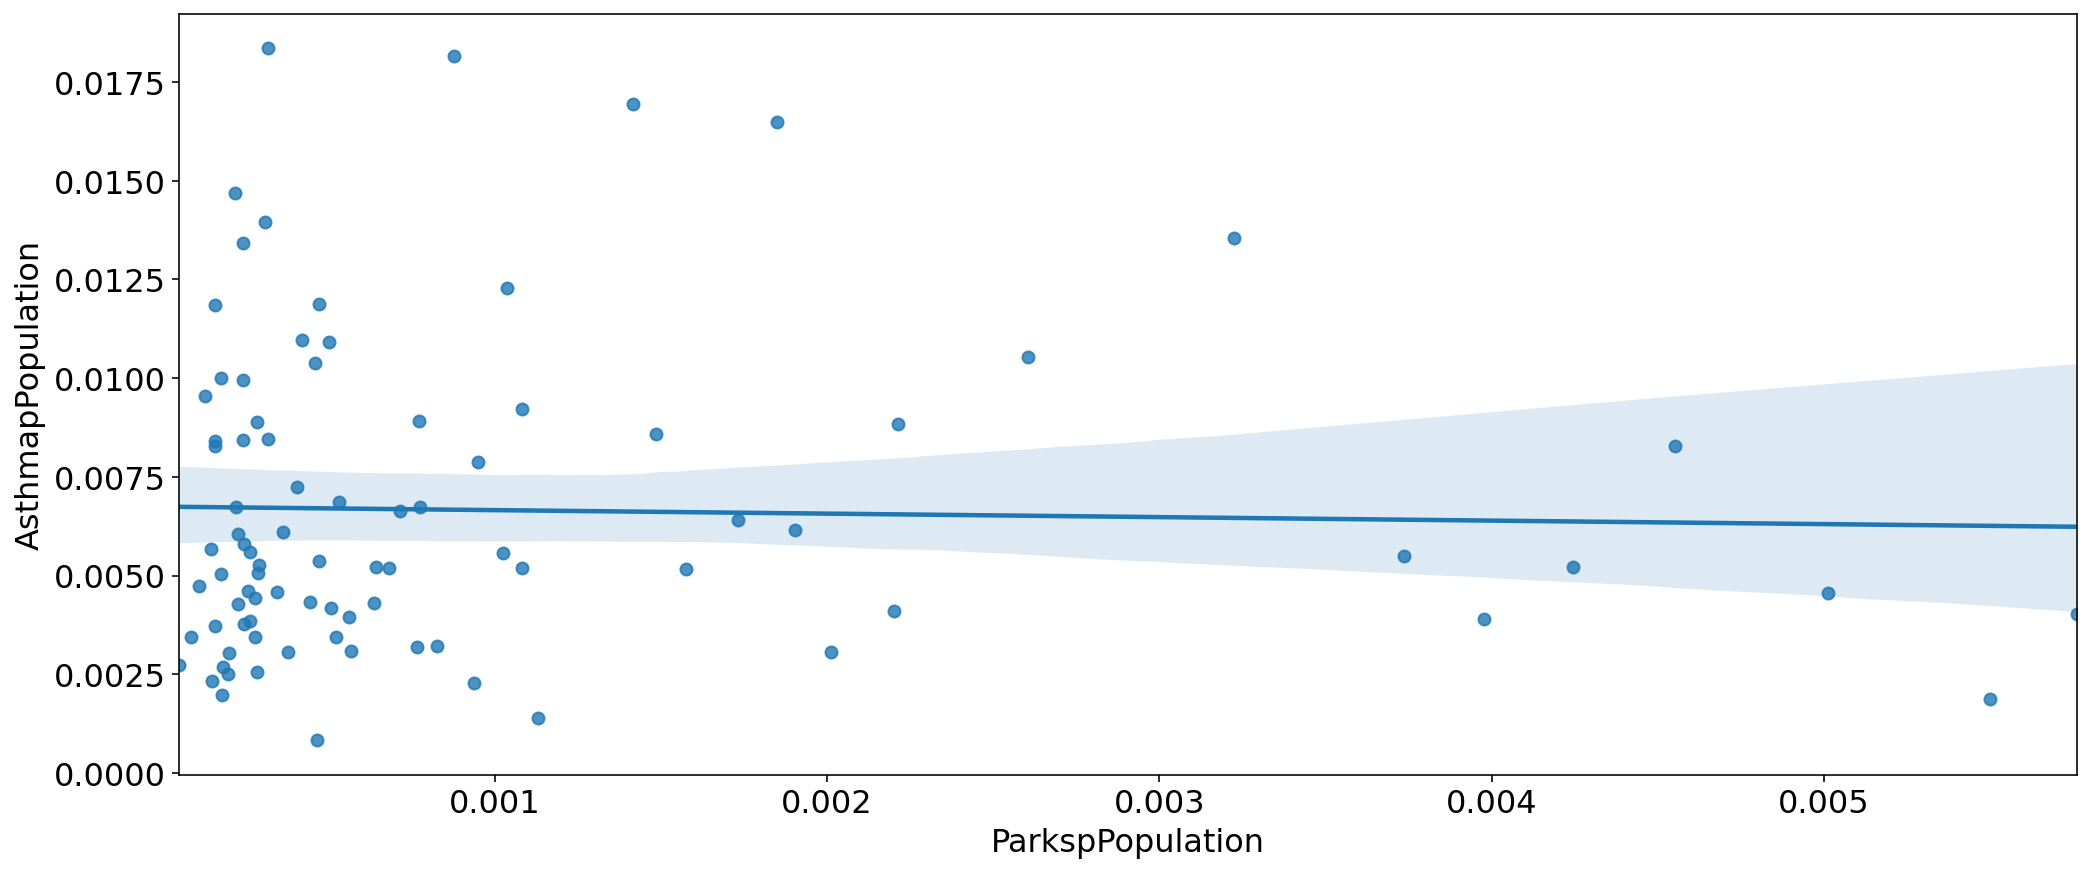

In [21]:
# Generate and plot the model fit line
sns.regplot(x="ParkspPopulation", y="AsthmapPopulation", data=result);

By looking at the model fit line and p-value > 0.05, we can conclude that there is no relationship between Park distributions in San Diego County and  Asthma cases.

###### Relationship Park locations and Low Birth Weight cases

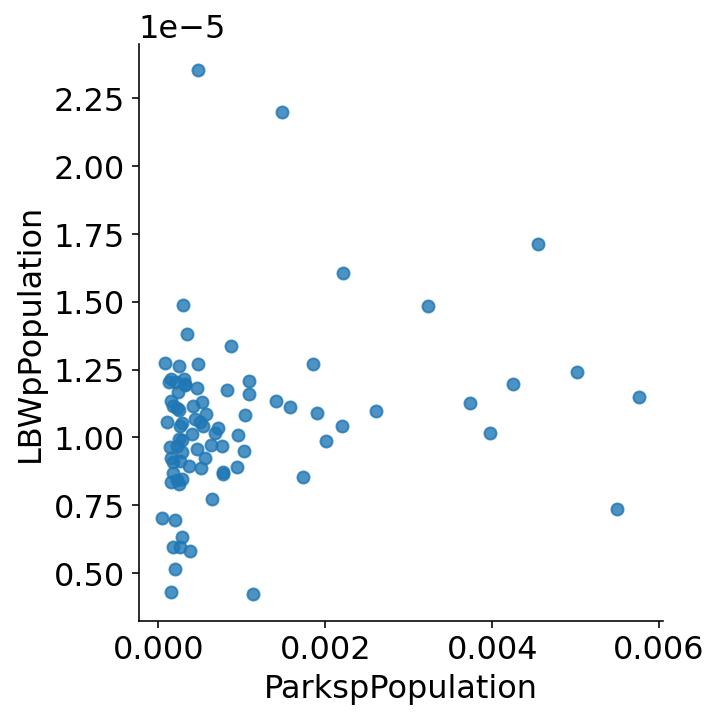

In [22]:
# scatterplot
sns.lmplot(x='ParkspPopulation', y= 'LBWpPopulation', 
           data=result, fit_reg=False);

The points represent the zip code areas. The majority of the points are close to 0, however there seems to be a small relationship between Parks per Population and Low Bith Weight per Population.

The linear regression can be examined using the following equation.
\begin{equation}
outcome = \beta_0 + \beta_1*predictor
\end{equation}

In [23]:
#create matrix with 'Parks per Population' and 'LBW per Population' points
outcome, predictors = patsy.dmatrices('ParkspPopulation ~ LBWpPopulation', result)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       ParkspPopulation   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.994
Date:                Mon, 14 Dec 2020   Prob (F-statistic):             0.0489
Time:                        19:57:41   Log-Likelihood:                 458.52
No. Observations:                  87   AIC:                            -913.0
Df Residuals:                      85   BIC:                            -908.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.332e-05      0.000      0.

Using the information above we can rewrite the equation.
\begin{equation}
outcome = -0.0003  + 659.5477*predictor
\end{equation}

To see the relationship better, find the fit line for the plot model.

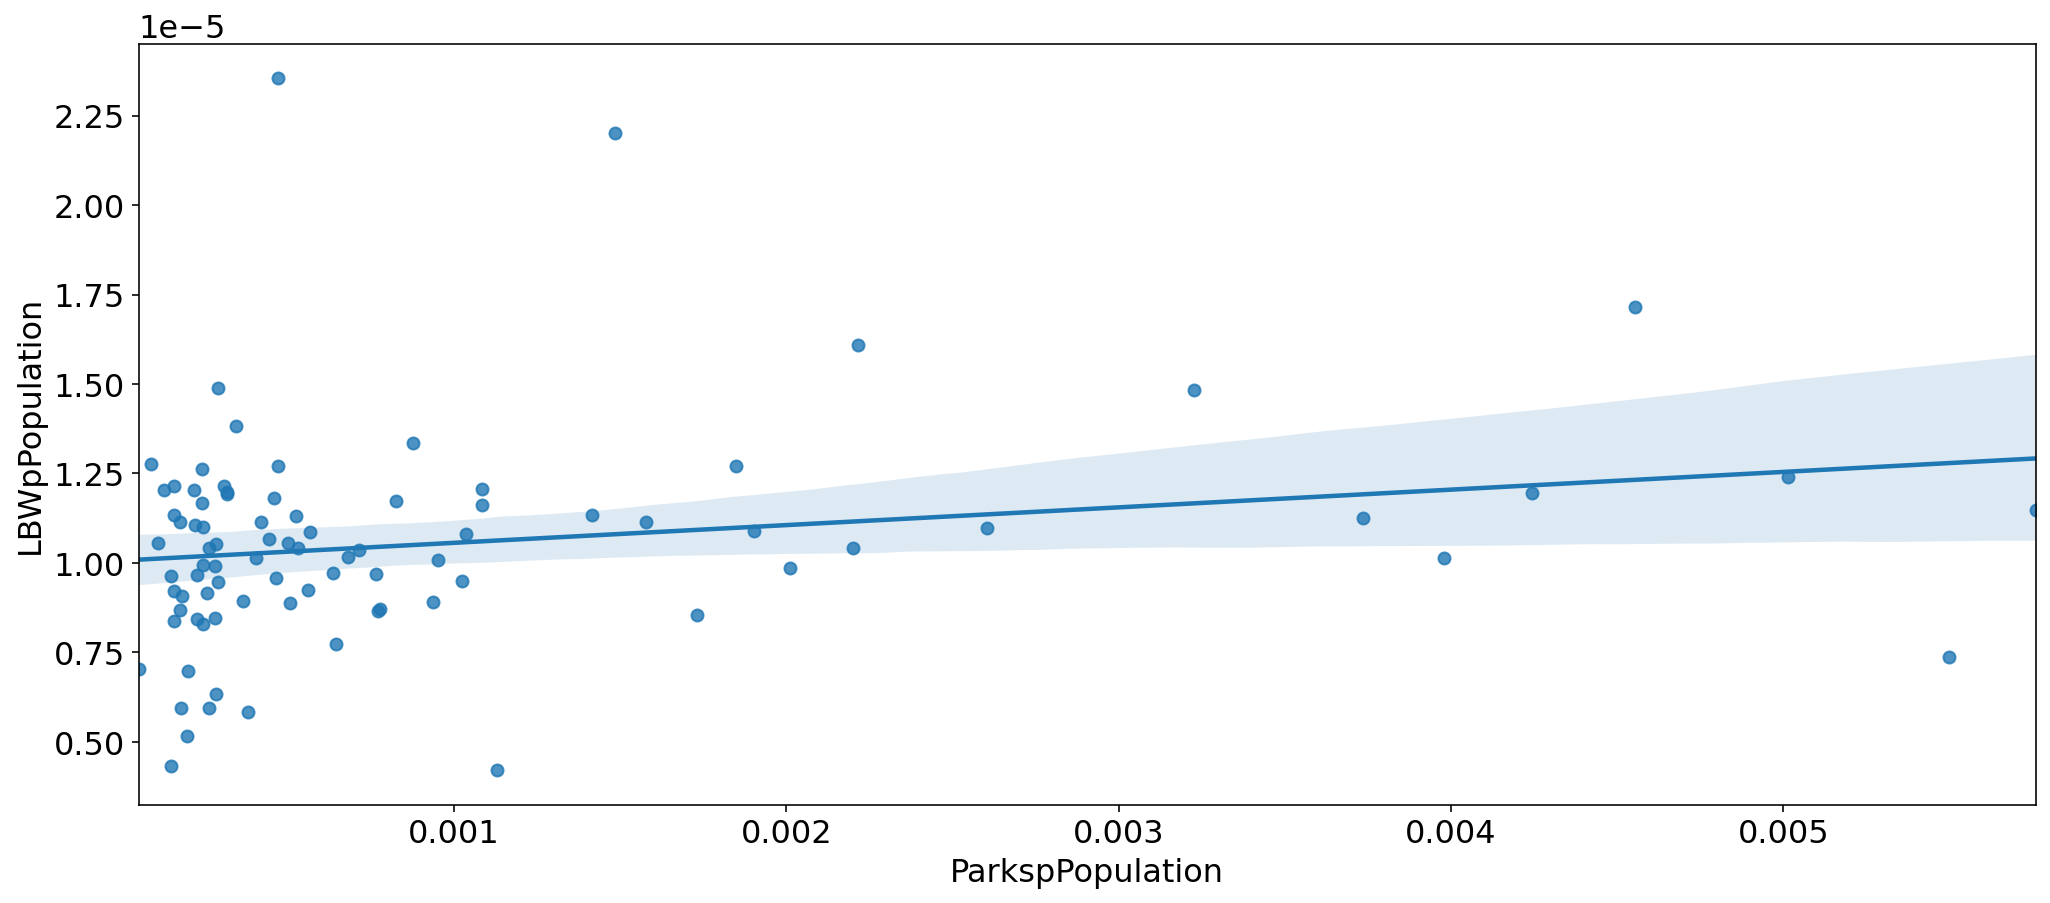

In [24]:
# Generate and plot the model fit line
sns.regplot(x="ParkspPopulation", y="LBWpPopulation", data=result);

By looking at the model fit line and p-value > 0.05, we can conclude that there is no relationship between Park distributions in San Diego County and Low Bith Weights.

# Ethics & Privacy

There were three datasets used in this project. The first dataset, Park Location Data, was given with project data. It was retrieved from data.sandiego.gov, which is publicly accessible. The Park Location Data includes information about San Diego County Park locations, total area, ownership and geolocation. All this information can be found publicly and it does not have any privacy issues. This data was used to measure the consistency of parks in each Zip Code area, which was just arithmetics and didn’t violate the consistency of the original data.

The second dataset, California Environmental Health Screening Data was also given with the project. This information is published in data.ca.gov and it is publicly available. Health Screening Data was collected by CalEPA and does not include any personal information about San Diego County Residents. Data that was used for this project includes San DiegoZip Code area populations, Asthma and Low Birth Weight information. This data wasn’t grouped by zip areas, and in order to combine identical Zip Data, sums were calculated.

The final Dataset, California Zip Codes Geo was retrieved from Github. It includes California Geolocations corresponding to each zip code in California. This research only examined zip codes that were included in San Diego County and other information was dropped. The main focus of this data was to merge San Diego Park locations and Health Screening data. All health and park information was grouped by zip codes and was merged with Geo Codes. This data also gave an opportunity to plot the given data and see park distributions and population distributions. Geolocation of each zip code is publicly available data, there this data does not violet any privacy constraints.

# Conclusion & Discussion

This project intended to find a relationship between Park distributions in San Diego County and  Asthma cases and a relationship between Park distributions in San Diego County and Low Birth Weights. Three datasets were used in order to determine the relationship between these two arguments: San Diego County Park Locations, San Diego County Health Screenings and California Zip Codes Geolocations. First step was to determine how to combine Health and Park datasets. The data related to heath was separated by address and population, while Park was represented with geolocations. The best approach was to split San Diego County into zip code areas and examine each separately. Parks that intersected with the given Zip Code Area were  summed together. Health Screenings that shared the same Zip were combined, therefore Asthma and Low Birth Weight cases were summed up. 

The plot of the relationship between Park distributions in San Diego County and Asthma cases, didn’t show much correlation. Most of the points on the plot were close to 0, which indicated that most of the Zip Code areas in San Diego have law Park count per Population. The plot of the relationship between Park distributions in San Diego County and Low Birth Weights cases, didn’t show much correlation either. With examining the plots and p-values the null hypothesis wasn’t rejected. It can be concluded that there is no relationship between Park distributions in San Diego County and  Asthma cases and no relationship between Park distributions in San Diego County and Low Birth Weights.

This project had multiple limitations. First, the dataset included parks that were privately owned. The access to these parks is limited, and it was not possible to disclude these parks due to lack of information. Another constraint was that the locations of the parks were determined by intersections with the Zip Code Areas. This means that Parks might intersect with multiple zip areas and my algorithm would choose the first interaction. Finally, San Diego County has 3 major universities, all with housing options which does affect the geographics of Zip Code Areas.

I still keep my hypothesis, and I believe that with more information there is a possibility to find a correlation between Park distributions in San Diego County and  Asthma cases in San Diego County. It is unfortunate that members of the community might have different severity of health conditions due to lack of Park access and limited financing. 
